### Compressibility Chart for n-Butane

This program plots the compressibility of n-butane using three different equation of state:
- Redlich Kwong (RK)
- Redlich Kwong Soave (SRK)
- Peng Robinson (PR)

The equation of state for each model is given bellow:

**Redlich Kwong**

\begin{align}
V^3 P &- V^2 RT + V(a-Pb^2-RTb)-ab = 0   \\
a &= 0.42748 \frac{R^2 T_c^2}{P_c}\alpha  \\
\alpha &= \frac{1}{T_r^{0.5}}   \\
b &= 0.0664 \frac{R T_c}{P_c} \\
\end{align}

**Redlich Kwong Soave**

\begin{align}
V^3 P &- V^2 RT + V(a-Pb^2-RTb)-ab = 0   \\
a &= 0.42748 \frac{R^2 T_c^2}{P_c}\alpha  \\
b &= 0.0664 \frac{R T_c}{P_c} \\
\\
\alpha &= [1+m(1-T_r^{0.5})]^2 \\
m &= 0.480+1.57\omega - 0.17 \omega^2 \\
\end{align}

**Peng Robinson**

\begin{align}
V^3 P &+ V^2 (bP-RT)+V(a-3Pb^2 - 2RTb)+(Pb^3+RTb^2-ab)=00   \\
a &= 0.45724 \frac{R^2 T_c^2}{P_c}\alpha  \\
b &= 0.07780 \frac{R T_c}{P_c} \\
\\
\\
\alpha &= [1+m(1-T_r^{0.5})]^2 \\
m &= 0.437464+1.54226\omega - 0.26992 \omega^2 \\
\end{align}

Where the reduced &temperature $T_c$ and compressibility $Z$ is given by:
\begin{align}
T_r &= \frac{T}{T_c} \\
Z &= \frac{PV}{RT} 
\end{align}


#### Solution method
To plot the compressibility for n-butane, in a range of pressure and at constant tempressure the molar volume from different EOS shall be calculated. To do this the nonlinear EOS shall be solved several times for a set of ($P, T$) when, pressure ($P$), and temperature ($T$) are known. Here **fsolve** from *scipy.optimize* has been used.

In [22]:
from scipy.optimize import fsolve
from numpy import linspace, zeros
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
R=0.08206    #atm.L/gmol.K

# for n-butane
Tc=425.2    #K
Pc=37.5     #atm
Omega=0.193 #Acentric factor

In [29]:
def RK(V, P):
    """
    Redlich Kwong equation of state
    """
   
    alpha=(Tc/T)**0.5
    a=0.42748*( (R*Tc)**2 /Pc)*alpha
    b=0.08664*(R*Tc/Pc)
    
    # Redlich-Kwong equtaion
    f=P*V**3 - R*T*V**2 + (a-P*b**2 - R*T*b)*V - a*b
    return f


In [36]:
def SRK(V, P):
    """
    Redlich Kwong Soave equation of state
    """
   
    m = 0.480 + (1.574 - 0.176*Omega)*Omega
    alpha = (1 + m *(1-(T/Tc)**0.5)) ** 2
    a = 0.42748*( (R*Tc)**2 /Pc)*alpha
    b = 0.08664*(R*Tc/Pc)
       
    # Redlich-Kwong Soave equtaion
    f=P*V**3 - R*T*V**2 + (a-P*b**2 - R*T*b)*V - a*b
    return f

In [43]:
def PR(V, P):
    """
    Peng Robinson equation of state
    """
    m = 0.37363 + (1.54226 - 0.26992*Omega)*Omega
    alpha = (1 + m *(1-(T/Tc)**0.5)) ** 2
    a = 0.45724 * alpha * (R * Tc) ** 2 / Pc
    b = 0.07780 * (R * Tc / Pc)
    
    # Peng Robinson equtaion
    f=P*V**3 + (b*P - R*T)*V**2 + (a- 3*P*b**2 - 2*R*T*b)*V +  \
      (P*b**3 + R*T*b**2-a*b)
    return f

#### Solution
Solve the nonlinear equation using **fsolve** method from scipy.

**fsolve(func,x0)** finds a root of the (non-linear) equations defined by func(x) = 0 given a starting estimate.

In [64]:
T=500 #K
n=9  # number of points
P=linspace(1,27,n)  #atm
Z_RK=zeros(n)
Z_SRK=zeros(n)
Z_PR=zeros(n)

# Find V from EOSs for a set of P and constant T
for i in range(n):
    Vo=R*T/P[i]  #Initial guess
    V_RK=  fsolve(RK,Vo,P[i])
    Z_RK[i]=(P[i]*V_RK)/(R*T)
    V_SRK= fsolve(SRK,Vo,P[i])
    Z_SRK[i]=(P[i]*V_SRK)/(R*T)
    V_PR=  fsolve(PR,Vo,P[i])
    Z_PR[i]=(P[i]*V_PR)/(R*T)
    
print('Compressibility of n-butane using different EOS')    
print('-----------------------------------------------')

print('    P,    Z_RK     Z_SRK     Z_PR')
for i in range(n):
    print("%8.2f %8.5f %8.5f %8.5f" % (P[i],Z_RK[i],Z_SRK[i], Z_PR[i]))

Compressibility of n-butane using different EOS
-----------------------------------------------
    P,    Z_RK     Z_SRK     Z_PR
    1.00  0.99435  0.99476  0.99390
    4.25  0.97580  0.97759  0.97397
    7.50  0.95696  0.96021  0.95392
   10.75  0.93782  0.94263  0.93373
   14.00  0.91835  0.92484  0.91341
   17.25  0.89856  0.90684  0.89296
   20.50  0.87842  0.88863  0.87240
   23.75  0.85792  0.87022  0.85174
   27.00  0.83706  0.85161  0.83099


#### Visualization

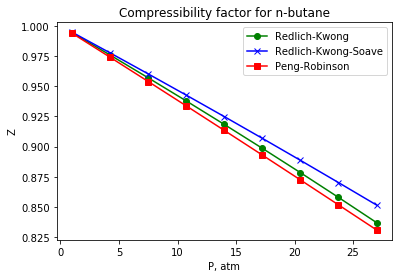

In [69]:
plt.plot(P, Z_RK,'o-g', label='Redlich-Kwong')
plt.plot(P, Z_SRK,'x-b',label='Redlich-Kwong-Soave')
plt.plot(P, Z_PR,'s-r', label='Peng-Robinson')
plt.xlabel('P, atm')
plt.ylabel('Z')
plt.title('Compressibility factor for n-butane')
plt.legend(loc='best')